In [1]:
%load_ext autoreload
import GCMPy as gp
%aimport GCMPy
%autoreload 1
import math
import random
import matplotlib.pyplot as plt
#%matplotlib inline
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.optimize import minimize
import seaborn as sns

In [2]:
sns.set(style='ticks', context='paper')
colors=["#045447","#A6262E","#FFBB00","#253060","#8EAB27","#36B5AA"]
sns.set_palette(colors)

## Import Peterson & Barney 1952 as pb52, convert to Bark

In [3]:
pb52=pd.read_csv('pb52.csv')
pbbark = gp.HzToBark(pb52,["F0","F1","F2","F3"])
pbbark.sample(5)

,type,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3
260,m,m,14,FLEECE,1,114,228,2350,2860,0.943645,2.263729,14.087981,15.378008
216,m,m,11,GOOSE,1,162,290,760,2300,1.516758,2.925511,6.961029,13.944883
446,m,m,23,TRAP,1,115,760,1580,2440,0.955855,6.961029,11.436045,14.337364
679,w,f,34,NURSE,2,200,560,1750,2100,1.952407,5.427778,12.116226,13.337241
431,m,m,22,PALM,2,125,750,1160,2080,1.077314,6.889742,9.437821,13.273168


## Set some parameters

In [4]:
# set c, the sensitivity of exemplar cloud
cval=25

# set dimesnsions m as keys, 
    ## set weight of each dimension w_m as values
dimsvals={'z0':1,'z1':.761,'z2':.681,'z3':.407}
dimslist = list(dimsvals.keys())

# set categories to be considered as items in a list
catslist=['vowel','type']

# set the test set to be a copy of the exemplar cloud
test = pbbark.copy()

## Categorize exemplar cloud

In [5]:
choices = gp.multicat(test,pbbark,catslist,dimsvals,cval,exclude_self=True, N=1)

### Generate confusion matrix

In [6]:
gp.confusion(choices,catslist)

{'vowel': vowelChoice  DRESS  FLEECE  FOOT  GOOSE   KIT  NURSE  PALM  STRUT  THOUGHT  \
 DRESS         0.89    0.00  0.00   0.00  0.09   0.00  0.00   0.00     0.00   
 FLEECE        0.00    0.97  0.00   0.00  0.03   0.00  0.00   0.00     0.00   
 FOOT          0.00    0.00  0.83   0.13  0.00   0.00  0.01   0.01     0.03   
 GOOSE         0.00    0.00  0.12   0.85  0.00   0.00  0.00   0.00     0.03   
 KIT           0.03    0.05  0.00   0.00  0.91   0.00  0.00   0.00     0.00   
 NURSE         0.03    0.00  0.01   0.00  0.02   0.93  0.00   0.00     0.00   
 PALM          0.00    0.00  0.01   0.00  0.00   0.00  0.89   0.06     0.04   
 STRUT         0.00    0.00  0.00   0.00  0.00   0.00  0.08   0.91     0.01   
 THOUGHT       0.00    0.00  0.00   0.03  0.00   0.00  0.07   0.00     0.90   
 TRAP          0.12    0.00  0.00   0.00  0.00   0.00  0.00   0.00     0.00   
 
 vowelChoice  TRAP  
 DRESS        0.02  
 FLEECE       0.00  
 FOOT         0.00  
 GOOSE        0.00  
 KIT          0

## Stereotypicality of voices

In [7]:
acc = gp.checkaccuracy(choices,"type")

In [8]:
inaccuratetype = acc.loc[acc['typeAcc']=="n"].reset_index()
accuratetype = acc.loc[acc['typeAcc']=="y"].reset_index()
inaccuratew = acc.loc[acc['type']=="w"].reset_index()

In [9]:
inaccuratew = inaccuratetype.loc[inaccuratetype['type']=="w"].reset_index()

In [10]:
inaccuratew.to_csv('inaccuratew.csv')

Text(0.5, 0, 'Speaker')

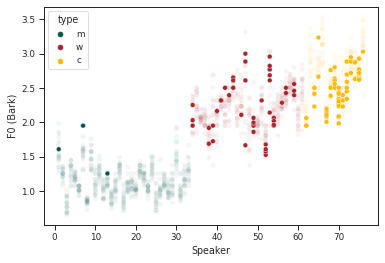

In [11]:
p=sns.scatterplot(y="z0", x="speaker", data=inaccuratetype, hue="type")
sns.scatterplot(y="z0", x="speaker", data=accuratetype, hue="type", alpha=0.05,legend=False)
p.set_ylabel("F0 (Bark)")
p.set_xlabel("Speaker")

In [12]:
gp.confusion(inaccuratetype,catslist)['vowel']

vowelChoice,DRESS,FLEECE,FOOT,GOOSE,KIT,NURSE,PALM,STRUT,THOUGHT,TRAP
DRESS,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
FLEECE,0.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
FOOT,0.00,0.0,0.88,0.12,0.00,0.00,0.00,0.00,0.00,0.00
GOOSE,0.00,0.0,0.11,0.78,0.00,0.00,0.00,0.00,0.11,0.00
KIT,0.00,0.0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
NURSE,0.12,0.0,0.03,0.00,0.09,0.71,0.00,0.00,0.00,0.06
PALM,0.00,0.0,0.00,0.00,0.00,0.00,0.93,0.07,0.00,0.00
STRUT,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.86,0.14,0.00
THOUGHT,0.00,0.0,0.00,0.05,0.00,0.00,0.20,0.00,0.75,0.00
TRAP,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


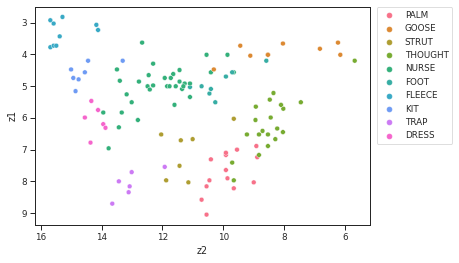

In [14]:
pl = sns.scatterplot(y="z1",x="z2",data=inaccuratetype, hue="vowel")
pl.invert_yaxis()
pl.invert_xaxis()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [16]:
len(inaccuratetype['speaker'].unique())

34

# Categorical perception stuff

In [17]:
datasumm = gp.datasummary(pbbark,catslist,dimslist)
start = {"type":"w","vowel":"STRUT"}
end = {"type":"w","vowel":"FOOT"}
terms = {"vowel":["STRUT","FOOT"]}
biasval=100
bias_on="type"
cont = gp.continuum(datasumm, start, end, dimslist, steps=7)

In [18]:
choices_cont = gp.multicat(cont,pbbark,catslist,dimsvals,cval,exclude_self=True,N=1,fc=terms)

In [19]:
choices_cont
# make a function that gets the stimulus number at which category changes

,z0,z1,z2,z3,vowelChoice,vowelProb,typeChoice,typeProb
0,2.20047,6.936452,10.662141,15.151736,STRUT,0.978657,w,0.967774
1,2.22096,6.553161,10.452729,15.117624,STRUT,0.973328,w,0.967974
2,2.24145,6.169870,10.243318,15.083513,STRUT,0.752393,w,0.880092
3,2.26194,5.786579,10.033906,15.049401,FOOT,0.379215,w,0.848513
4,2.28243,5.403288,9.824495,15.015290,FOOT,0.691772,w,0.929751
5,2.30292,5.019998,9.615083,14.981178,FOOT,0.967424,w,0.948452
6,2.32341,4.636707,9.405672,14.947067,FOOT,0.924998,w,0.930296


2.5


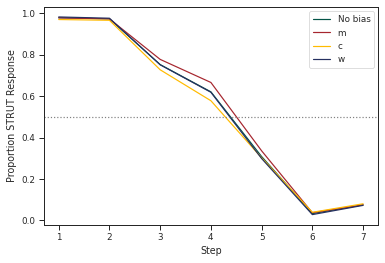

5


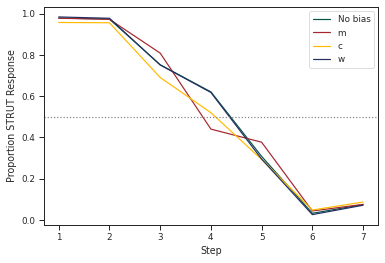

7.5


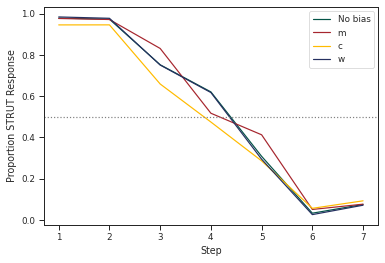

10


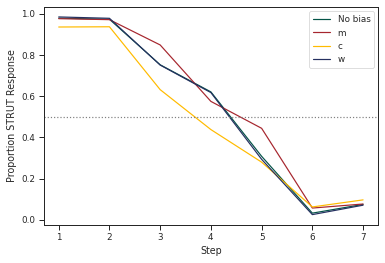

25


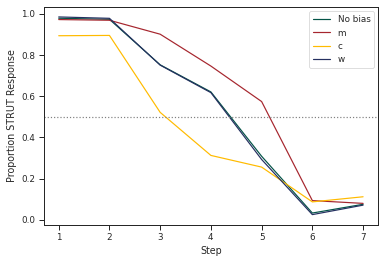

50


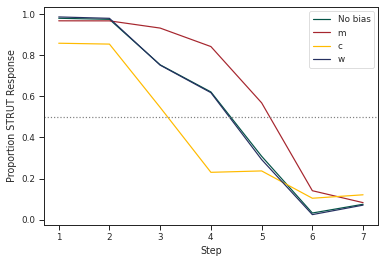

75


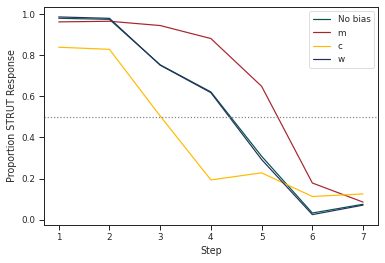

100


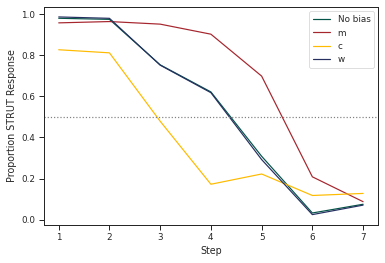

250


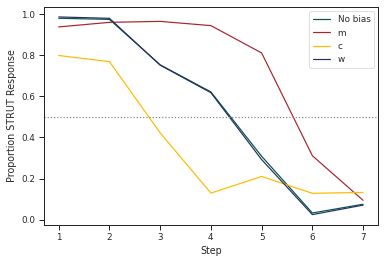

500


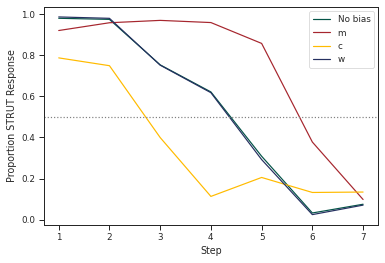

1000


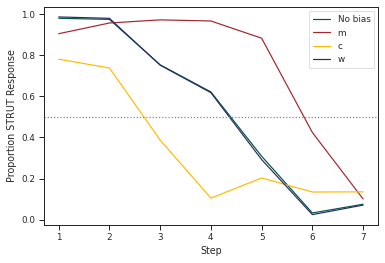

10000


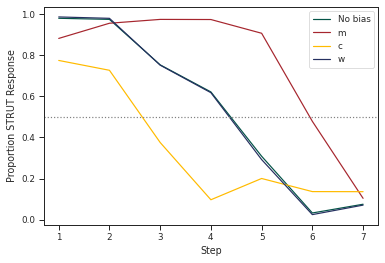

100000


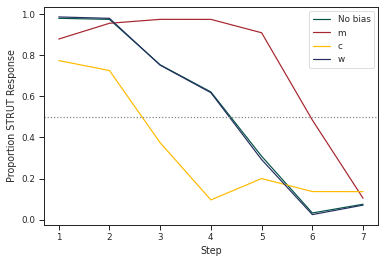

In [21]:
for i in [2.5, 5, 7.5, 10, 25, 50, 75, 100,250,500,1000,10000,100000]:
    biasval=i
    
    mbias = gp.multicatprime(cont,pbbark,catslist,dimsvals,cval,cat=bias_on,catbias={"w":1,"c":1, "m": biasval},exclude_self=True,fc=terms)
    cbias = gp.multicatprime(cont,pbbark,catslist,dimsvals,cval,cat=bias_on,catbias={"w":1,"m":1, "c": biasval},exclude_self=True,fc=terms)
    wbias = gp.multicatprime(cont,pbbark,catslist,dimsvals,cval,cat=bias_on,catbias={"c":1,"m":1, "w": biasval},exclude_self=True,fc=terms)
    nobias = gp.multicatprime(cont,pbbark,catslist,dimsvals,cval,cat=bias_on,catbias={"c":1,"m":1, "w": 1},exclude_self=True,fc=terms)
    
    print(i)
    gp.cpplot([nobias,mbias,cbias,wbias],"vowel",["No bias","m","c","w"])

    

# CP with non-stereotypical voices

Start:  index              1048
type                  w
gender                f
speaker              53
vowel             STRUT
repetition            1
F0                  275
F1                  920
F2                 1512
F3                 2950
z0              2.76877
z1             8.034306
z2            11.145323
z3            15.577841
Name: 0, dtype: object
End:  index              1055
type                  w
gender                f
speaker              53
vowel              FOOT
repetition            2
F0                  280
F1                  510
F2                 1415
F3                 3130
z0              2.82125
z1             5.005668
z2            10.710341
z3            15.956306
Name: 0, dtype: object
Start:  index               968
type                  w
gender                f
speaker              49
vowel             STRUT
repetition            1
F0                  200
F1                  720
F2                 1440
F3                 2380
z0             1.952

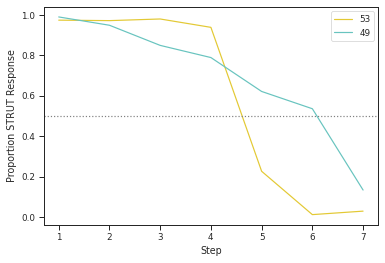

In [32]:
#the amount of energy it took to decide whether to make a function for this

startvowel = "STRUT"
endvowel = "FOOT"
speakerlist = [53,49]
data = pbbark.copy()
datalist = []


for sp in speakerlist:
    # set start and end
    strt = {"vowel":startvowel,"speaker":sp}
    nd = {"vowel":endvowel,"speaker":sp}
    # make continuum
    cnt = gp.continuum(data,strt,nd,dimslist,steps=7,stimdetails=True)
    # make choices
    chcs = gp.multicat(cnt,data,catslist,dimsvals,cval,exclude_self=True, N=1,fc={"vowel":[startvowel,endvowel]})
    datalist.append(chcs)

gp.cpplot(datalist,"vowel", speakerlist)



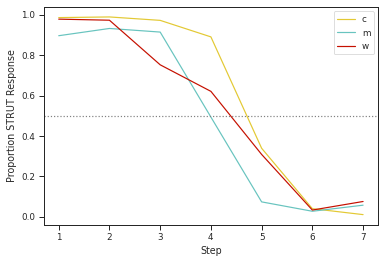

In [27]:
# Add averages for comparison:
typelist = ["c","m","w"]
dtsmm = gp.datasummary(pbbark,catslist,dimslist)

datalist2 = []
for t in typelist:
    # set start and end
    strt = {"vowel":startvowel,"type":t}
    nd = {"vowel":endvowel,"type":t}
    # make continuum
    cnt = gp.continuum(dtsmm,strt,nd,dimslist,steps=7)
    # make choices
    chcs2 = gp.multicat(cnt,data,catslist,dimsvals,cval,exclude_self=True, N=1,fc={"vowel":[startvowel,endvowel]})
    datalist2.append(chcs2)

gp.cpplot(datalist2,"vowel", typelist)
